In [ ]:
1.XGBOOST Model

E:\python\lib\site-packages\xgboost\core.py:158: UserWarning: [21:28:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy: 68.83%


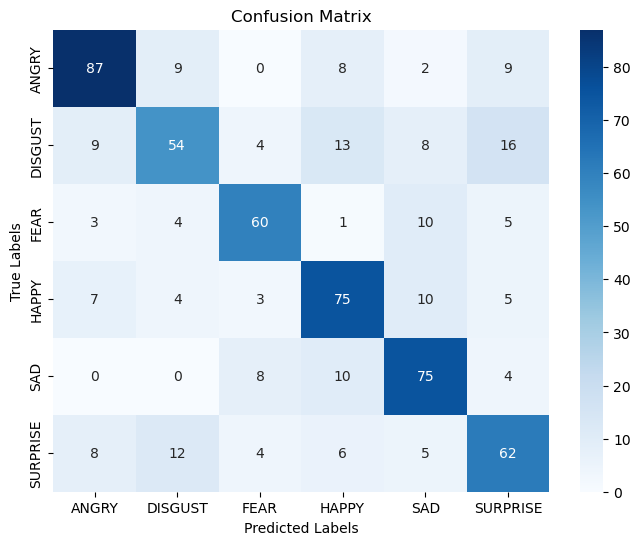

Classification Report:
              precision    recall  f1-score   support

       ANGRY       0.76      0.76      0.76       115
     DISGUST       0.65      0.52      0.58       104
        FEAR       0.76      0.72      0.74        83
       HAPPY       0.66      0.72      0.69       104
         SAD       0.68      0.77      0.72        97
    SURPRISE       0.61      0.64      0.63        97

    accuracy                           0.69       600
   macro avg       0.69      0.69      0.69       600
weighted avg       0.69      0.69      0.69       600



In [3]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load pre-extracted features and labels
features = np.load('F:/MS Thesis/Research/Features/features.npy')
labels = np.load('F:/MS Thesis/Research/Features/labels.npy')

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert the data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Multi-class classification
    'num_class': len(label_encoder.classes_),
    'eval_metric': 'mlogloss',     # Evaluation metric for multi-class classification
    'max_depth': 6,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'colsample_bytree': 0.7,
    'subsample': 0.8
}

# Set the evaluation list for early stopping
evals = [(dtrain, 'train'), (dval, 'eval')]

# Train the model with early stopping and without verbose output
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,  # Stop if no improvement in 10 rounds
    verbose_eval=False  # Prevent printing the training log
)

# Predict on the test set
y_pred = model.predict(dtest)

# Convert predictions to integer labels
y_pred = y_pred.astype(int)

# Evaluate accuracy
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



In [ ]:
2. Random Forest Classifer

Test Accuracy: 53.50%


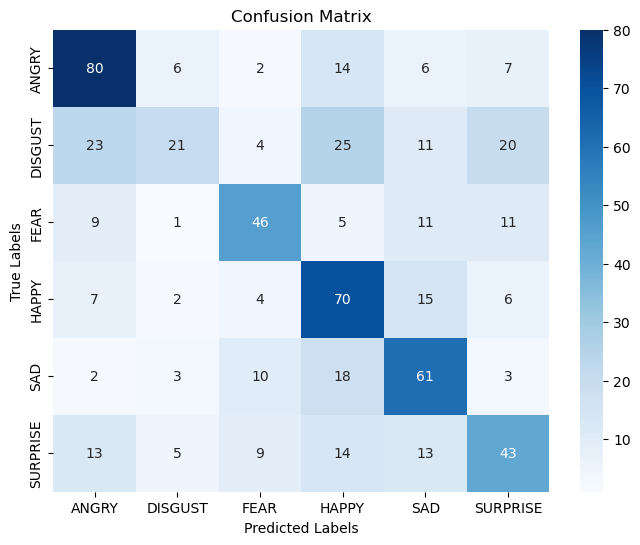

Classification Report:
              precision    recall  f1-score   support

       ANGRY       0.60      0.70      0.64       115
     DISGUST       0.55      0.20      0.30       104
        FEAR       0.61      0.55      0.58        83
       HAPPY       0.48      0.67      0.56       104
         SAD       0.52      0.63      0.57        97
    SURPRISE       0.48      0.44      0.46        97

    accuracy                           0.54       600
   macro avg       0.54      0.53      0.52       600
weighted avg       0.54      0.54      0.52       600



In [4]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load pre-extracted features and labels
features = np.load('F:/MS Thesis/Research/Features/features.npy')
labels = np.load('F:/MS Thesis/Research/Features/labels.npy')

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the Random Forest model
model = RandomForestClassifier(
    n_estimators=100,        # Number of trees
    max_depth=6,             # Maximum depth of trees
    random_state=42,         # Seed for reproducibility
    n_jobs=-1,               # Use all available processors
    class_weight='balanced'  # Handle imbalanced classes
)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Epoch 1/30


E:\python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1995 - loss: 2.2627 - val_accuracy: 0.2400 - val_loss: 1.7846
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.2997 - loss: 1.6761 - val_accuracy: 0.3483 - val_loss: 1.6237
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3432 - loss: 1.5835 - val_accuracy: 0.3450 - val_loss: 1.5701
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3810 - loss: 1.5080 - val_accuracy: 0.3950 - val_loss: 1.5006
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4220 - loss: 1.4330 - val_accuracy: 0.3933 - val_loss: 1.4484
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4329 - loss: 1.4153 - val_accuracy: 0.4300 - val_loss: 1.4028
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4592 - loss: 1.3577 - val_accuracy: 0.4350 - val_loss: 1.3794
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4606 - loss: 1.3444 - val_accuracy: 0.413

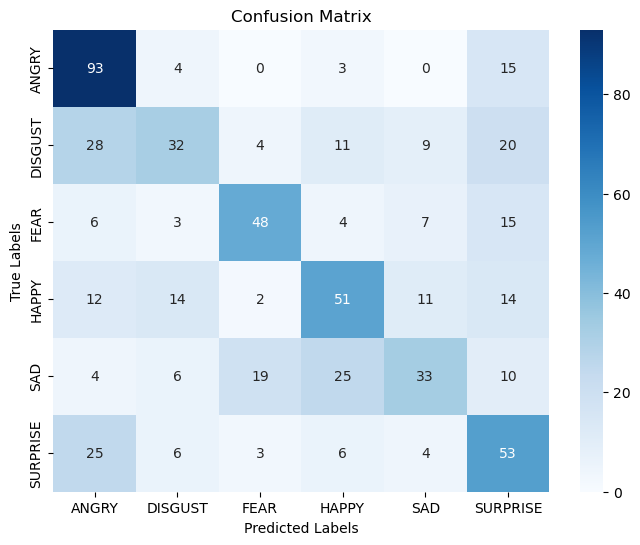

Classification Report:
              precision    recall  f1-score   support

       ANGRY       0.55      0.81      0.66       115
     DISGUST       0.49      0.31      0.38       104
        FEAR       0.63      0.58      0.60        83
       HAPPY       0.51      0.49      0.50       104
         SAD       0.52      0.34      0.41        97
    SURPRISE       0.42      0.55      0.47        97

    accuracy                           0.52       600
   macro avg       0.52      0.51      0.50       600
weighted avg       0.52      0.52      0.50       600



In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Load pre-extracted MFCC features and labels
features = np.load('F:/MS Thesis/Research/Features/features.npy')
labels = np.load('F:/MS Thesis/Research/Features/labels.npy')

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the dataset into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Reshape the input data for 1D CNN (add a channel dimension)
X_train = X_train[..., np.newaxis]  # Add channel dimension (shape: (samples, timesteps, features, 1))
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Define the 1D CNN model
model = models.Sequential([
    layers.Conv1D(64, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),  # Use kernel_size=1 for your current data shape
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=1, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(256, kernel_size=1, activation='relu'),
    layers.GlobalAveragePooling1D(),  # Use global average pooling instead of flatten
    layers.Dense(256, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Evaluate accuracy
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


In [ ]:
3. LSTM Model

Shape of X before reshaping: (6000, 13)
New shape of X after reshaping: (6000, 1, 13)
Label mapping: {'ANGRY': 0, 'DISGUST': 1, 'FEAR': 2, 'HAPPY': 3, 'SAD': 4, 'SURPRISE': 5}
Epoch 1/30


E:\python\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.2134 - loss: 1.7695 - val_accuracy: 0.3300 - val_loss: 1.6057
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3919 - loss: 1.5207 - val_accuracy: 0.4150 - val_loss: 1.4624
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4267 - loss: 1.4176 - val_accuracy: 0.3967 - val_loss: 1.4477
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4357 - loss: 1.3837 - val_accuracy: 0.4833 - val_loss: 1.3525
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4515 - loss: 1.3471 - val_accuracy: 0.4700 - val_loss: 1.3508
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4745 - loss: 1.3219 - val_accuracy: 0.4717 - val_loss: 1.3241
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4606 - loss: 1.3115 - val_accuracy: 0.4983 - val_loss: 1.2744
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4823 - loss: 1.2749 - val_accuracy: 0.5133 - val_

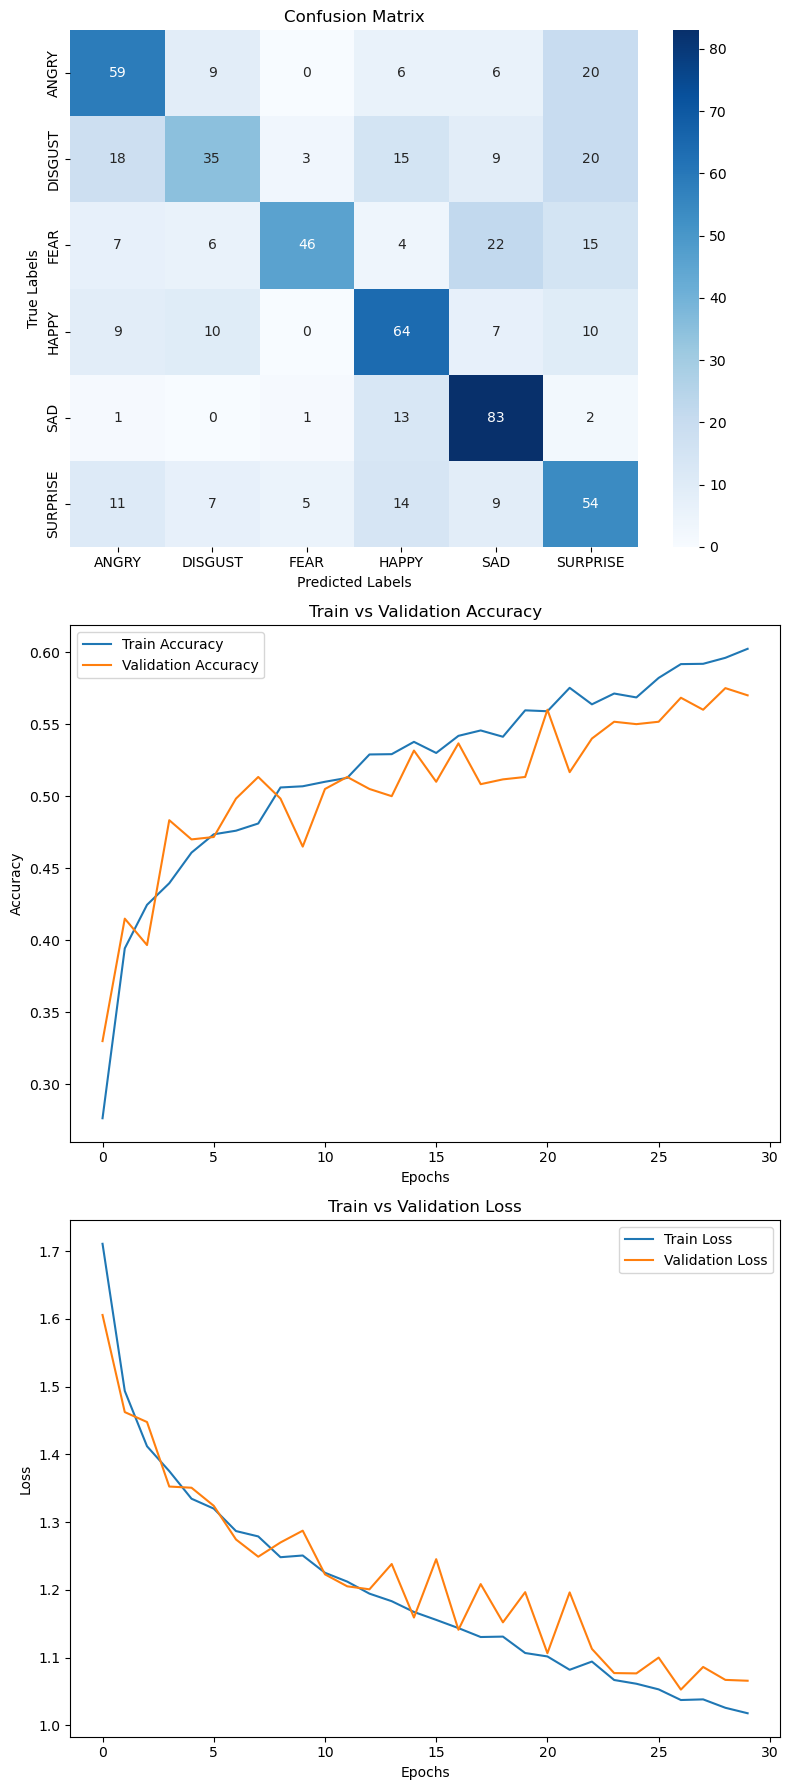

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Load the feature and label data
X = np.load('F:/MS Thesis/Research/Features/features.npy')  # Adjust the path if needed
y = np.load('F:/MS Thesis/Research/Features/labels.npy')  # Adjust the path if needed

# Check the shape of X to understand its dimensions
print("Shape of X before reshaping:", X.shape)

# Reshape X if needed (adding a time step dimension)
if len(X.shape) == 2:
    X = X.reshape((X.shape[0], 1, X.shape[1]))  # (samples, 1, features)
    print("New shape of X after reshaping:", X.shape)

# Label mapping (string to integer)
label_map = {label: idx for idx, label in enumerate(np.unique(y))}
print("Label mapping:", label_map)

# Convert labels to integers
y = np.array([label_map[label] for label in y])

# Train, Validation, Test Split (80-10-10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# LSTM Model
model = models.Sequential([
    layers.LSTM(128, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train.shape[1], activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model (epochs = 30)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(label_map.keys())))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot Results (One Column)
plt.figure(figsize=(8, 18))

# Confusion Matrix Plot
plt.subplot(3, 1, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(label_map.keys()), 
            yticklabels=list(label_map.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Accuracy Curve
plt.subplot(3, 1, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Curve
plt.subplot(3, 1, 3)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
4. Bi-LSTM Model

Shape of X before reshaping: (6000, 13)
New shape of X after reshaping: (6000, 1, 13)
Label mapping: {'ANGRY': 0, 'DISGUST': 1, 'FEAR': 2, 'HAPPY': 3, 'SAD': 4, 'SURPRISE': 5}


E:\python\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.2366 - loss: 1.7489 - val_accuracy: 0.4333 - val_loss: 1.5234
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3761 - loss: 1.5021 - val_accuracy: 0.4917 - val_loss: 1.3863
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4375 - loss: 1.4011 - val_accuracy: 0.4150 - val_loss: 1.3801
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4366 - loss: 1.3551 - val_accuracy: 0.4667 - val_loss: 1.3188
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4763 - loss: 1.2948 - val_accuracy: 0.4933 - val_loss: 1.2743
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.4884 - loss: 1.2833 - val_accuracy: 0.4767 - val_loss: 1.2830
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4985 - loss: 1.2682 - val_accuracy: 0.4950 - val_loss: 1.2558
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5094 - loss: 1.2308 - val_accu

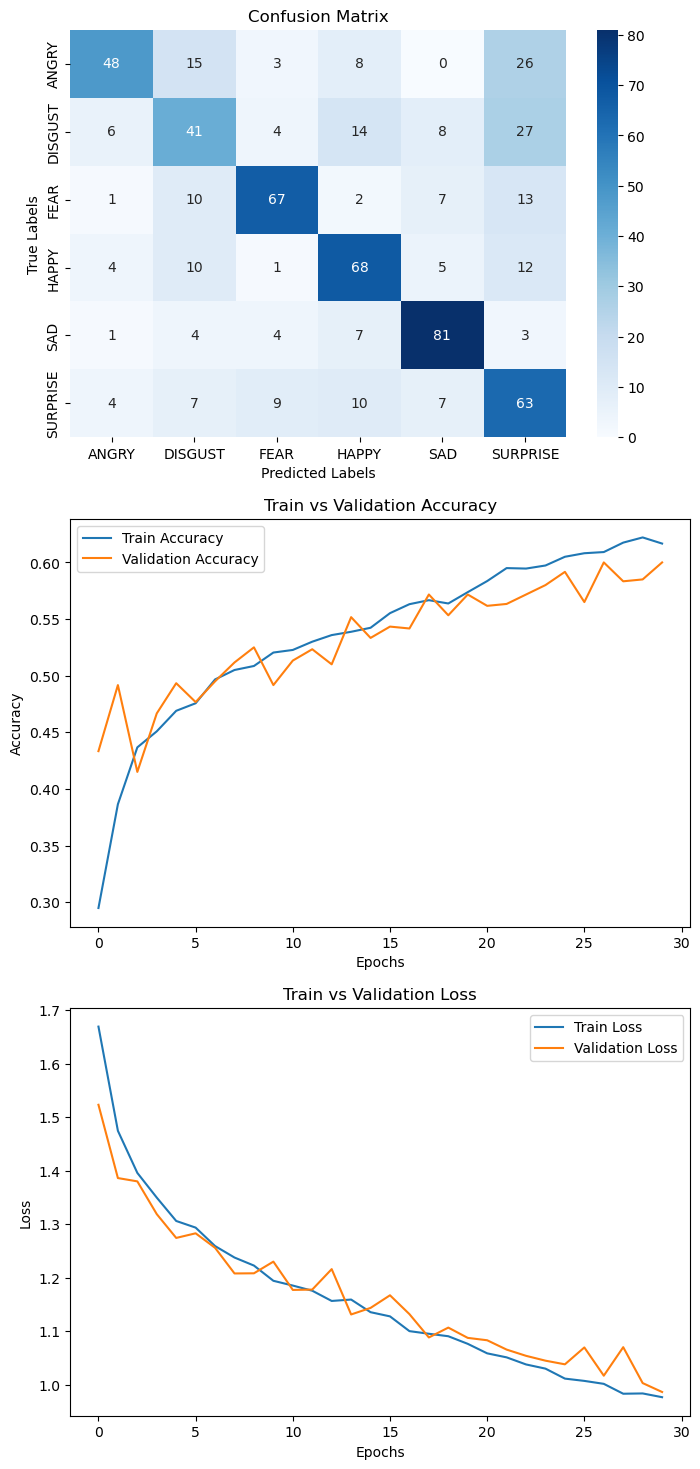

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Load the feature and label data
X = np.load('F:/MS Thesis/Research/Features/features.npy')  # Adjust path if needed
y = np.load('F:/MS Thesis/Research/Features/labels.npy')  # Adjust path if needed

# Check the shape of X to understand its dimensions
print("Shape of X before reshaping:", X.shape)

# Reshape X if needed (adding a time step dimension)
if len(X.shape) == 2:
    X = X.reshape((X.shape[0], 1, X.shape[1]))  # (samples, 1, features)
    print("New shape of X after reshaping:", X.shape)

# Label mapping (string to integer)
label_map = {label: idx for idx, label in enumerate(np.unique(y))}
print("Label mapping:", label_map)

# Convert labels to integers
y = np.array([label_map[label] for label in y])

# Train, Validation, Test Split (80-10-10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Bi-LSTM Model
model = models.Sequential([
    layers.Bidirectional(layers.LSTM(128, return_sequences=False), input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train.shape[1], activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model (epochs = 30)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(label_map.keys())))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot Results (One Column)
plt.figure(figsize=(8, 18))

# Confusion Matrix Plot
plt.subplot(3, 1, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(label_map.keys()), 
            yticklabels=list(label_map.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Accuracy Curve
plt.subplot(3, 1, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Curve
plt.subplot(3, 1, 3)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


plt.show()


In [ ]:
5. CNN Model

Shape of X before reshaping: (6000, 13)
New shape of X after reshaping: (6000, 13, 1)
Label mapping: {'ANGRY': 0, 'DISGUST': 1, 'FEAR': 2, 'HAPPY': 3, 'SAD': 4, 'SURPRISE': 5}
Epoch 1/30


E:\python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.2318 - loss: 2.6765 - val_accuracy: 0.2983 - val_loss: 1.6974
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3806 - loss: 1.5232 - val_accuracy: 0.4150 - val_loss: 1.6214
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3739 - loss: 1.5664 - val_accuracy: 0.4133 - val_loss: 1.3828
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4273 - loss: 1.3973 - val_accuracy: 0.4583 - val_loss: 1.3576
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4831 - loss: 1.3341 - val_accuracy: 0.4133 - val_loss: 1.4441
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4404 - loss: 1.3831 - val_accuracy: 0.4633 - val_loss: 1.3230
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4915 - loss: 1.3053 - val_accuracy: 0.5000 - val_loss: 1.2948
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4962 - loss: 1.2728 - val_accuracy: 0.5117 - val_

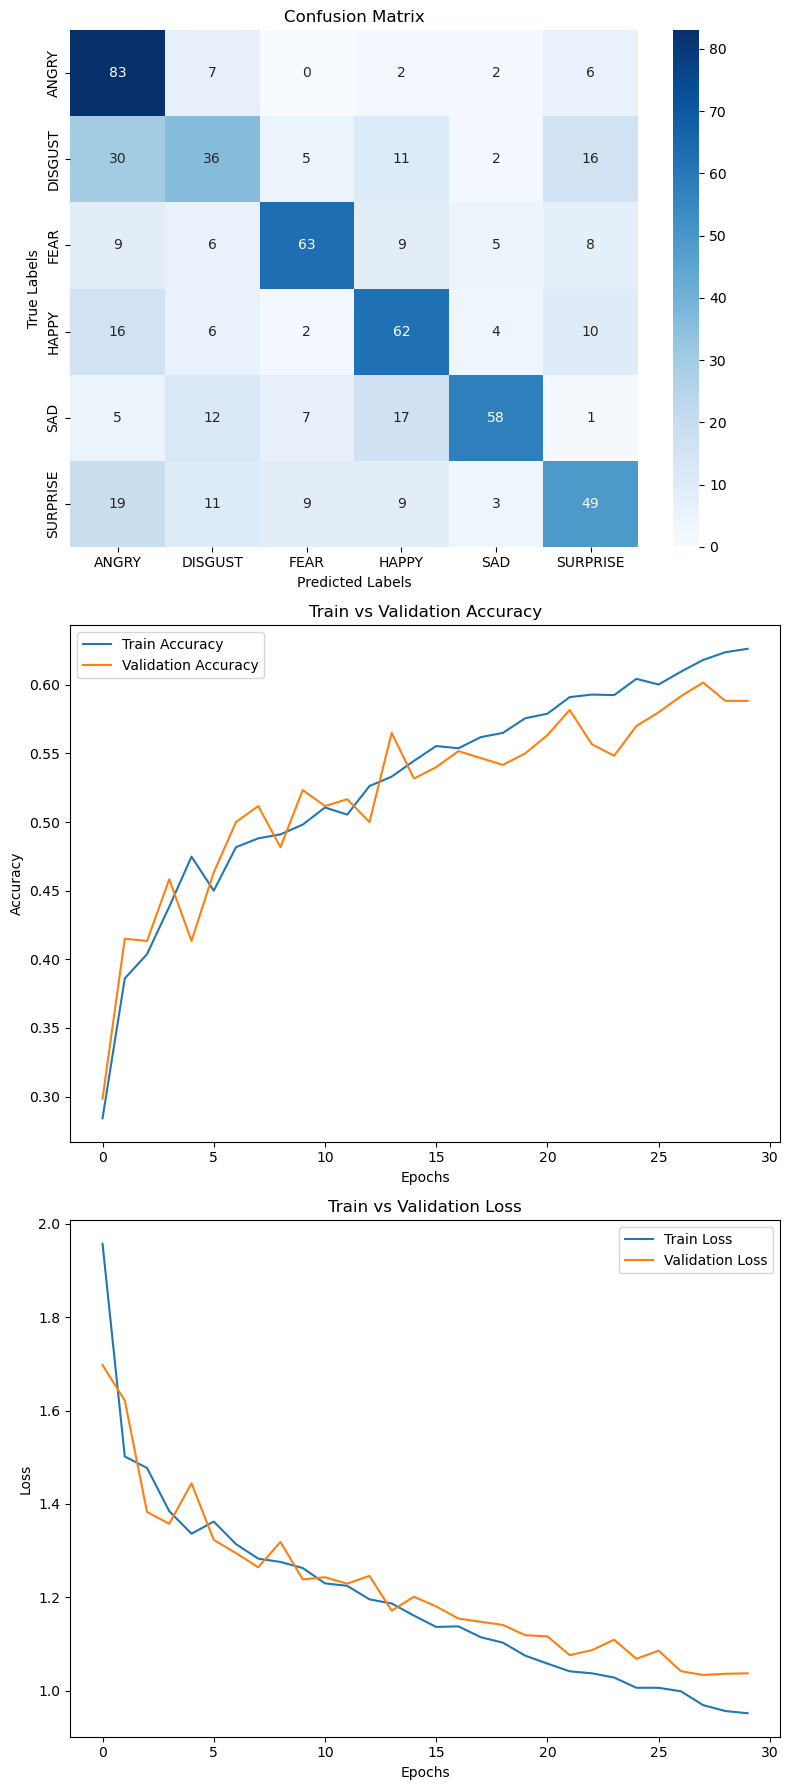

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Load the feature and label data
X = np.load('F:/MS Thesis/Research/Features/features.npy')  # Adjust path if needed
y = np.load('F:/MS Thesis/Research/Features/labels.npy')  # Adjust path if needed

# Check the shape of X to understand its dimensions
print("Shape of X before reshaping:", X.shape)

# Reshape X if needed (adding a channel dimension for CNN input)
if len(X.shape) == 2:
    X = X.reshape((X.shape[0], X.shape[1], 1))  # (samples, features, 1)
    print("New shape of X after reshaping:", X.shape)

# Label mapping (string to integer)
label_map = {label: idx for idx, label in enumerate(np.unique(y))}
print("Label mapping:", label_map)

# Convert labels to integers
y = np.array([label_map[label] for label in y])

# Train, Validation, Test Split (80-10-10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# CNN Model
model = models.Sequential([
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(y_train.shape[1], activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model (epochs = 30)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(label_map.keys())))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot Results (One Column)
plt.figure(figsize=(8, 18))

# Confusion Matrix Plot
plt.subplot(3, 1, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=list(label_map.keys()), 
            yticklabels=list(label_map.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Accuracy Curve
plt.subplot(3, 1, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Curve
plt.subplot(3, 1, 3)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
6. CNN+Bi-LSTM Model

Shape of X before reshaping: (6000, 13)
New shape of X after reshaping: (6000, 13, 1)
Label mapping: {'ANGRY': 0, 'DISGUST': 1, 'FEAR': 2, 'HAPPY': 3, 'SAD': 4, 'SURPRISE': 5}


E:\python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.2484 - loss: 1.7290 - val_accuracy: 0.4067 - val_loss: 1.5110
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4060 - loss: 1.4508 - val_accuracy: 0.4617 - val_loss: 1.3691
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4593 - loss: 1.3556 - val_accuracy: 0.4800 - val_loss: 1.3028
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4769 - loss: 1.2934 - val_accuracy: 0.4683 - val_loss: 1.3136
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5014 - loss: 1.2433 - val_accuracy: 0.4867 - val_loss: 1.2417
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5257 - loss: 1.2143 - val_accuracy: 0.5133 - val_loss: 1.1983
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5401 - loss: 1.1551 - val_accuracy: 0.5167 - val_loss: 1.1789
Epoch 8/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5617 - loss: 1.1267 - val_acc

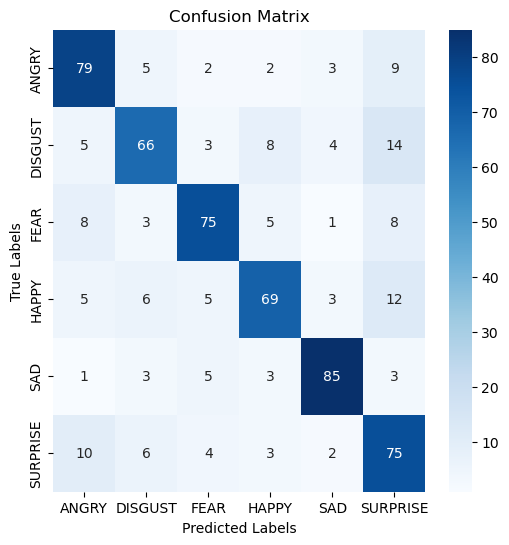

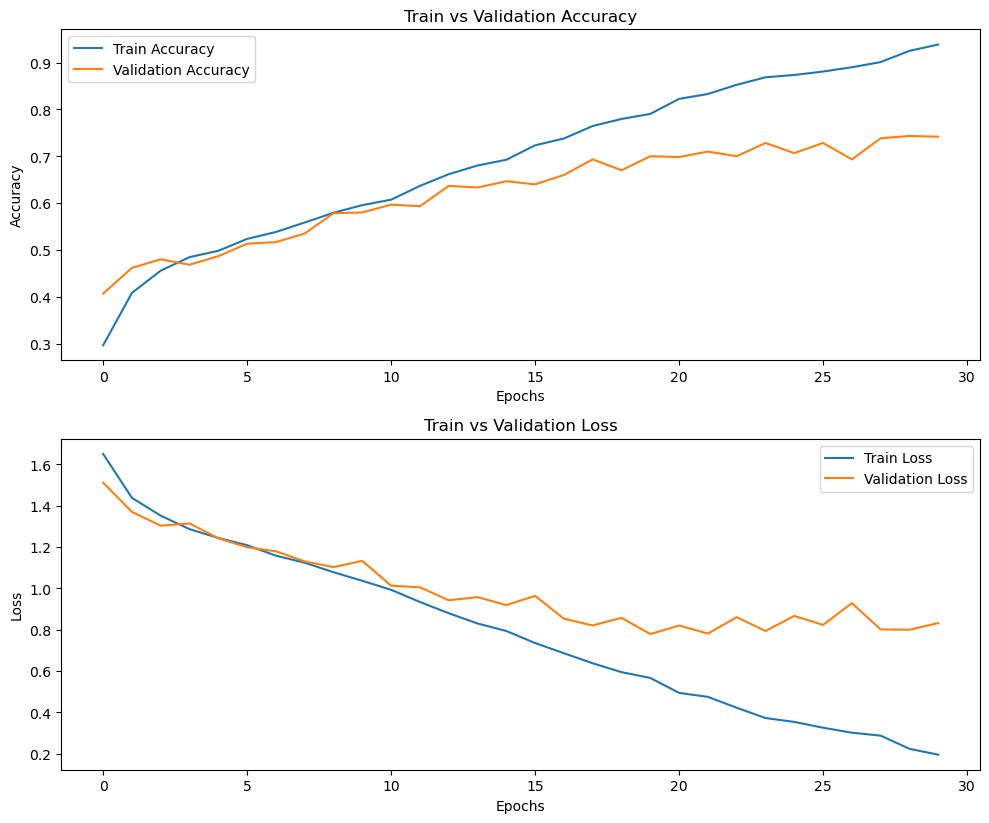

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Load the feature and label data
X = np.load('F:/MS Thesis/Research/Features/features.npy')  # Adjust the path if needed
y = np.load('F:/MS Thesis/Research/Features/labels.npy')  # Adjust the path if needed

# Check the shape of X to understand its dimensions
print("Shape of X before reshaping:", X.shape)

# If X has only 2 dimensions, reshape it accordingly
if len(X.shape) == 2:
    X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape for CNN input (samples, features, channels)
    print("New shape of X after reshaping:", X.shape)

# Create a mapping from labels (strings) to integers
label_map = {label: idx for idx, label in enumerate(np.unique(y))}
print("Label mapping:", label_map)

# Convert string labels to integers
y = np.array([label_map[label] for label in y])

# Split the data into train, validation, and test sets (80% training, 10% validation, 10% testing)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Build the CNN + Bi-LSTM hybrid model
model = models.Sequential([
    # 1D CNN Layer for feature extraction
    layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.MaxPooling1D(pool_size=2),
    
    # 1D CNN Layer (additional)
    layers.Conv1D(128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    # Bi-LSTM Layer for temporal modeling
    layers.Bidirectional(layers.LSTM(128, return_sequences=False)),

    # Fully connected layer
    layers.Dense(64, activation='relu'),
    
    # Output layer with softmax activation
    layers.Dense(y_train.shape[1], activation='softmax')  # y_train.shape[1] is the number of classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(label_map.keys())))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(label_map.keys()), yticklabels=list(label_map.keys()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Plot Train vs Validation Curves
plt.figure(figsize=(10, 12))

# Accuracy Curve
plt.subplot(3, 1, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Curve
plt.subplot(3, 1, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
